In [3]:
import networkx as nx
import numpy as np
import csv
import spacy
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Graph Construction

In [4]:
# add nodes
 
G = nx.Graph()
G_copy = nx.Graph()
sentences = []
with open('data.csv','r') as csvfile:
    file = csv.reader(csvfile, delimiter="|")
    for row in file:
        sentences.append(row[1])
        G.add_node(row[1], article_index = row[0])
        G_copy.add_node(row[1], article_index = row[0])

In [5]:
'''''''''running time of this cell is about one minute'''''''''

# add edges with weight 
# rule: if the two sentences' similarity > N, these two nodes have edge

nlp = spacy.load("en_core_web_lg")
for i in range(len(sentences)-1):
    for j in range(i+1, len(sentences)):
        doc1 = nlp(sentences[i])
        doc2 = nlp(sentences[j])
        similarity = ((doc1.similarity(doc2))-0.5)*200 # 0 - 100
        if similarity > 85:
            G.add_edge(sentences[i], sentences[j], weight=similarity)
            G_copy.add_edge(sentences[i], sentences[j], weight=similarity)
print(G)


Graph with 91 nodes and 356 edges


# Current Graph Structure

In [6]:
CC_number = nx.number_connected_components(G)
print('CC_number = ' + str(CC_number))
number_of_nodes_in_CC = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print('# nodes in connected components are ' + str(number_of_nodes_in_CC))

CC_number = 13
# nodes in connected components are [78, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


[11, 10, 5, 1, 8, 8, 4, 2, 6, 3, 6, 6, 2, 2, 3, 1, 1, 3, 0, 1, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


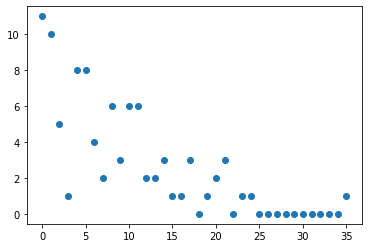

In [7]:
degree_sequence = nx.degree_histogram(G)
print(degree_sequence)
x = np.arange(len(degree_sequence))
fig, ax = plt.subplots()
ax.scatter(x, degree_sequence)

In [8]:
#remove the isolated nodes
CC = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
for i in range(CC_number):
    if number_of_nodes_in_CC[i]==1:
        G.remove_nodes_from(CC[i])

print(G)

Graph with 80 nodes and 356 edges


# Graph Analysis

### Clustering

In [14]:
number_of_communities = 15
c = greedy_modularity_communities(G, weight = 'weight',n_communities = number_of_communities)
all_S = []
for i in range(number_of_communities):
    all_S.append(list(c[i]))
    

### Extract the salient sentence in each community

In [15]:
# Betweenness_centrality

top_sentences_in_each_community = []

for h in range(number_of_communities):
    S = nx.Graph()
    S_each = all_S[h]
    S.add_nodes_from(S_each)
    for i in range(len(S_each)-1):
        for j in range(i+1, len(S_each)):
            doc1 = nlp(S_each[i])
            doc2 = nlp(S_each[j])
            similarity = ((doc1.similarity(doc2))-0.5)*200
            if similarity>80:
                S.add_edge(S_each[i], S_each[j], weight=similarity, distance = 100-similarity)

    S_rank = nx.betweenness_centrality(S,weight='weight')
    S_rank = sorted(S_rank.items(), key=lambda item: item[1], reverse=True)
    top_sentences_in_each_community.append(S_rank[0])

    # Select the meaningful sentencers (centrality value > 0)
    for sentence in top_sentences_in_each_community:
        if sentence[1] > 0:
            print(sentence[0])

 The part-of-speech tagging used (both in training and testing) is the HMM tagging distributed with the treebank, with a tagging accuracy of 94.1%, and with the tagset compressed to 61 tags as in Collins et al. (1999)
 The part-of-speech tagging used (both in training and testing) is the HMM tagging distributed with the treebank, with a tagging accuracy of 94.1%, and with the tagset compressed to 61 tags as in Collins et al. (1999)
 Most previous dependency parsing models have focused on projective trees, including the work of Eisner (1996), Collins et al. (1999), Yamada and Matsumoto (2003), Nivre and Scholz (2004), and McDonald et al. (2005).
 The part-of-speech tagging used (both in training and testing) is the HMM tagging distributed with the treebank, with a tagging accuracy of 94.1%, and with the tagset compressed to 61 tags as in Collins et al. (1999)
 Most previous dependency parsing models have focused on projective trees, including the work of Eisner (1996), Collins et al. (1

In [ ]:
# Eigenvector_centrality

top_sentences_in_each_community = []
for h in range(number_of_communities):
    S = nx.Graph()
    S_each = all_S[h]
    S.add_nodes_from(S_each)
    for i in range(len(S_each)-1):
        for j in range(i+1, len(S_each)):
            doc1 = nlp(S_each[i])
            doc2 = nlp(S_each[j])
            similarity = ((doc1.similarity(doc2))-0.5)*200
            if similarity>80:
                S.add_edge(S_each[i], S_each[j], weight=similarity, distance = 100-similarity)
    S_rank = nx.eigenvector_centrality(S, weight='weight')
    S_rank = sorted(S_rank.items(), key=lambda item: item[1], reverse=True)
    top_sentences_in_each_community.append(S_rank[0])

In [10]:

top_sentences_in_each_community = []

for h in range(number_of_communities):
    S = nx.Graph()
    S_each = all_S[h]
    S.add_nodes_from(S_each)
    for i in range(len(S_each)-1):
        for j in range(i+1, len(S_each)):
            doc1 = nlp(S_each[i])
            doc2 = nlp(S_each[j])
            similarity = ((doc1.similarity(doc2))-0.5)*200
            if similarity>80:
                S.add_edge(S_each[i], S_each[j], weight=similarity, distance = 100-similarity)
    #S_rank = nx.eigenvector_centrality(S, weight='weight')
    #S_rank = nx.closeness_centrality(S, distance = 'distance')
    #S_rank = nx.degree_centrality(S)
    S_rank = nx.betweenness_centrality(S,weight='weight')
    S_rank = sorted(S_rank.items(), key=lambda item: item[1], reverse=True)
    top_sentences_in_each_community.append(S_rank[0])


 The part-of-speech tagging used (both in training and testing) is the HMM tagging distributed with the treebank, with a tagging accuracy of 94.1%, and with the tagset compressed to 61 tags as in Collins et al. (1999)
 Most previous dependency parsing models have focused on projective trees, including the work of Eisner (1996), Collins et al. (1999), Yamada and Matsumoto (2003), Nivre and Scholz (2004), and McDonald et al. (2005).
 Collins et al. (1999b) proposed an algorithm to convert the Czech dependency Treebank into a phrase structure Treebank and do dependency parsing through Collins (1999a)'s model.
 So, Collins et al. (1999) proposed a tag classification for parsing the Czech treebank.
